# *CA5*_*Task 1*

# load data

In [74]:
folder_path = 'data/football.csv'

In [75]:
import pandas as pd

# Load the csv file
df = pd.read_csv(folder_path)

#Find helpfull insights about the columns of the data set



In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8925 non-null   object 
 1   playerId               8925 non-null   object 
 2   playType               8925 non-null   object 
 3   bodyPart               8925 non-null   object 
 4   x                      8925 non-null   float64
 5   y                      8925 non-null   float64
 6   interveningOpponents   8925 non-null   int64  
 7   interveningTeammates   8925 non-null   int64  
 8   interferenceOnShooter  8891 non-null   object 
 9   minute                 8925 non-null   int64  
 10  second                 8925 non-null   int64  
 11  outcome                8891 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 836.8+ KB


##Count unique values and their occurrences in 'matchId'

In [77]:
value_counts = df['matchId'].value_counts()

print(value_counts)


matchId
m_99     52
m_155    51
m_195    50
m_14     50
m_67     50
         ..
m_111    24
m_238    24
m_181    23
m_122    22
m_37     21
Name: count, Length: 240, dtype: int64


##Count unique values and their occurrences in 'playerId'

In [78]:
value_counts = df['playerId'].value_counts()

print(value_counts)

playerId
p_61     74
p_38     73
p_112    70
p_33     70
p_77     70
         ..
p_116    43
p_96     43
p_24     43
p_19     42
p_34     38
Name: count, Length: 160, dtype: int64


##Count the missing values

In [79]:
print("Number of missing values for each column:")
print(df.isnull().sum())

Number of missing values for each column:
matchId                   0
playerId                  0
playType                  0
bodyPart                  0
x                         0
y                         0
interveningOpponents      0
interveningTeammates      0
interferenceOnShooter    34
minute                    0
second                    0
outcome                  34
dtype: int64


In [80]:
null_rows = df[df['interferenceOnShooter'].isnull() & df['outcome'].isnull()]

print("Number of rows where both 'outcome' and 'interferenceOnShooter' are null:", len(null_rows))


Number of rows where both 'outcome' and 'interferenceOnShooter' are null: 34


**we can dropp the rows with null values beccause they are quite less than all of the rows which are 8925 rows**

In [81]:
df.dropna(inplace=True)

##Display unique values for categorical columns

In [82]:
object_columns = ['playType','bodyPart','interferenceOnShooter','outcome']

for column in object_columns:
    print(f"Unique values for {column}:")
    print(df[column].unique())
    print("\n")

Unique values for playType:
['open play' 'free kick' 'penalty' 'olimpico']


Unique values for bodyPart:
['right foot' 'left foot' 'head' 'other']


Unique values for interferenceOnShooter:
['medium' 'low' 'high']


Unique values for outcome:
['goal' 'saved by keeper' 'missed chance' 'blocked shot' 'hit the post']




## Add the minutes & seconds column instead of two seprate columns minute and seconds

In [83]:
df['minutes & seconds'] = df['minute'] + df['second'] / 60

df = df.drop('minute', axis=1)
df = df.drop('second', axis=1)

## Add a new feature as the time_range of the game

In [84]:
def get_time_range(time):
    if time < 45:
        return 'first half'
    elif 45 <= time <= 90:
        return 'second half'
    else:
        return 'overtime'

df['time_range'] = df['minutes & seconds'].apply(get_time_range)

## Add Angle as a new feature to the data set

In [85]:
df['a'] = 7.32 * df['x'] / (df['x']**2 + df['y']**2 - (7.32/2)**2)
import numpy as np

# Assuming df is your DataFrame and it has columns 'theta'
def calculate_angle(row):
    theta = row['a']
    if np.arctan(theta) >= 0:
        return np.rad2deg(np.arctan(theta))
    else:
        return np.rad2deg(np.arctan(theta + np.pi))

df['angle'] = df.apply(calculate_angle, axis=1)


## Add under_pressure as a new feature to the data set

In [86]:
import pandas as pd

# Assuming df is your DataFrame
df['under_pressure'] = (df['interferenceOnShooter'] == 'high') & (df['angle'] < 30)


## Add anew feature named region that devides the pitch into some importent regions

In [87]:
import pandas as pd
import numpy as np

def categorize_position(row):
    x, y = row['x'], row['y']
    width, length = 90, 120
    if 5.5 > x > 0 and 5.5 + (7.32/2) > y > 0:
        return 1
    elif 5.5 > x > 0 and -(5.5 + (7.32/2)) < y < 0:
        return 2
    elif 16.5 > x > 0 and 5.5 + (7.32/2) < y < 5.5 + (7.32/2) + 11:
        return 3
    elif 5.5 < x < 16.5 and -(5.5 + (7.32/2)) < y < 5.5 + (7.32/2):
        return 4
    elif 16.5 > x > 0 and -(5.5 + (7.32/2)) > y > -(5.5 + (7.32/2) + 11):
        return 5
    elif 16.5 > x > 0 and 5.5 + (7.32/2) + 11 < y < width/2:
        return 6
    elif 16.5 > x > 0 and -(5.5 + (7.32/2)+11) > y > -width/2:
        return 7
    elif 16.5 < x < length/2 and 5.5 + (7.32/2) + 11 < y < width/2:
        return 8
    elif 16.5 < x < length/2 and -(5.5 + (7.32/2) + 11) < y < (5.5 + (7.32/2) + 11):
        return 9
    elif 16.5 < x < length/2  and -(5.5 + (7.32/2)+11) > y > -width/2:
        return 10
    elif length/2 < x < length:
        return 11
    else:
        return np.nan

df_copy = df.copy()

df_copy['region'] = df_copy.apply(categorize_position, axis=1)

# Analysis on the data set

## displaying 5 top players (based on the number of goals)

In [88]:
top_players = df[df['outcome'] == 'goal'].groupby('playerId').size().sort_values(ascending=False).head(5)

print(top_players)


playerId
p_18     16
p_6      14
p_117    12
p_105    12
p_29     11
dtype: int64


## removing the rows that doesn't make sense logicaly

In [89]:
grouped = df.groupby(['playType', 'bodyPart']).size().unstack()

print(grouped)


bodyPart     head  left foot  other  right foot
playType                                       
free kick     1.0      174.0    NaN       242.0
olimpico      1.0        1.0    NaN         2.0
open play  1506.0     2693.0   51.0      4094.0
penalty       NaN       24.0    NaN       102.0


In [90]:
df = df[~((df['playType'] == 'free kick') & (df['bodyPart'] == 'head'))]

df = df[~((df['playType'] == 'olimpico') & (df['bodyPart'] == 'head'))]


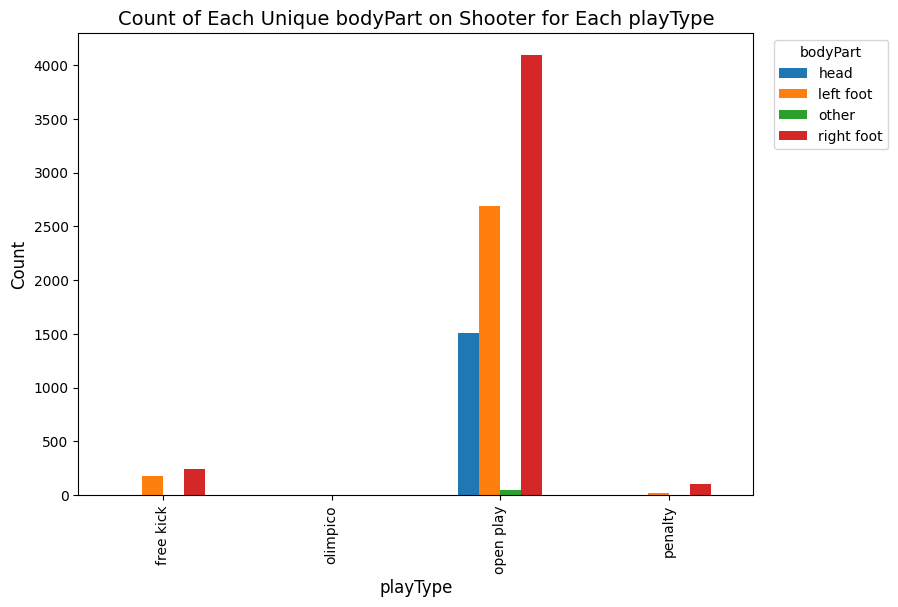

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame named df

# Grouping and counting occurrences of each unique combination of 'playType' and 'bodyPart'
grouped_data = df.groupby(['playType', 'bodyPart']).size().reset_index(name='Count')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = grouped_data.pivot(index='playType', columns='bodyPart', values='Count').plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('playType', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Count of Each Unique bodyPart on Shooter for Each playType', fontsize=14)

# Add legend
ax.legend(title='bodyPart', loc='upper left', bbox_to_anchor=(1.02, 1))

# Adjust spacing between subplots
plt.subplots_adjust(right=0.8)

# Display the plot
plt.show()


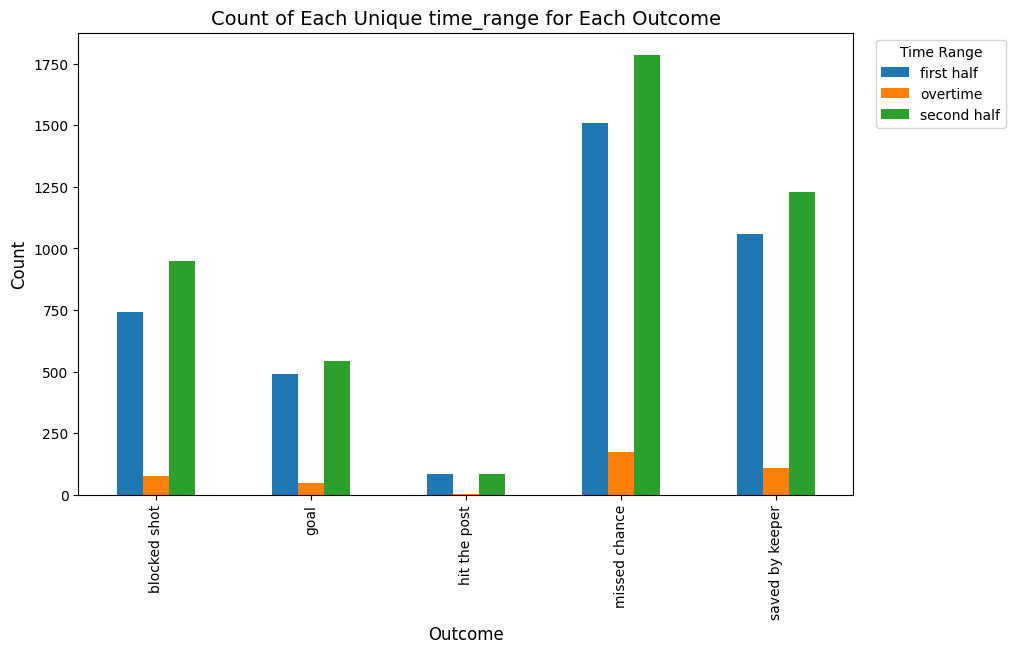

In [92]:
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame named df

# Grouping and unstacking the DataFrame
grouped = df.groupby(['outcome', 'time_range']).size().unstack()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Outcome', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Count of Each Unique time_range for Each Outcome', fontsize=14)

# Add legend
ax.legend(title='Time Range', loc='upper left', bbox_to_anchor=(1.02, 1))

# Display the plot
plt.show()


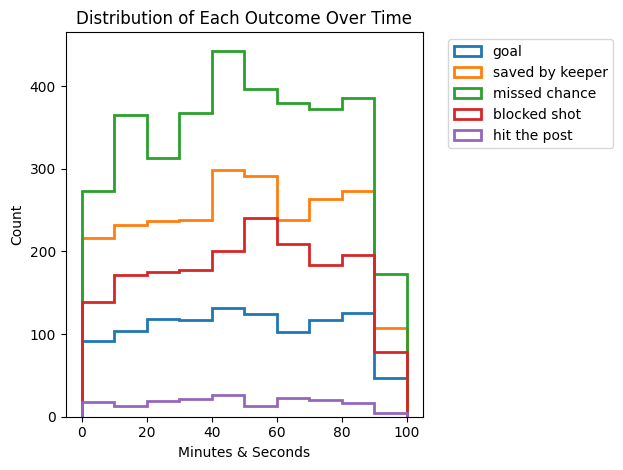

In [93]:
import matplotlib.pyplot as plt
import numpy as np

unique_outcomes = df['outcome'].unique()

for outcome in unique_outcomes:

    outcome_df = df[df['outcome'] == outcome]

    plt.hist(outcome_df['minutes & seconds'], bins=np.arange(0, outcome_df['minutes & seconds'].max() + 10, 10), histtype='step', linewidth=2, label=outcome)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Minutes & Seconds')
plt.ylabel('Count')
plt.title('Distribution of Each Outcome Over Time')
plt.tight_layout()
plt.show()

In [94]:
df.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,outcome,minutes & seconds,time_range,a,angle,under_pressure
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,goal,70.150000,second half,0.335451,18.544088,False
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,saved by keeper,55.066667,second half,0.249005,13.982592,False
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,saved by keeper,86.516667,second half,0.252171,14.153255,False
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,missed chance,77.033333,second half,0.276543,15.458384,False
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,goal,76.766667,second half,0.608390,31.315918,False


# Finding correaltion betweem diffrent type of variables (for details on how these functions work check this [link](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9%29))


##find correlation between categorical variables


In [95]:
import concurrent.futures as cf
import math
import warnings
from collections import Counter
from itertools import repeat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import scipy.stats as ss
import seaborn as sns
from psutil import cpu_count
from typing import (
    Union,
    Any,
    List,
    Optional,
    Callable,
    Tuple,
    Dict,
    Iterable,
    Set,
    Literal,
)


from pandas import DataFrame, Series
from typing import List, Union, Any
from numpy.typing import NDArray


Number = Union[int, float]
OneDimArray = Union[List[Number], NDArray, Series]
TwoDimArray = Union[NDArray, DataFrame]


from numpy.typing import NDArray, ArrayLike
from matplotlib.colors import Colormap


_REPLACE = "replace"
_DROP = "drop"
_DROP_SAMPLES = "drop_samples"
_DROP_FEATURES = "drop_features"
_DROP_SAMPLE_PAIRS = "drop_sample_pairs"
_SKIP = "skip"
_DEFAULT_REPLACE_VALUE = 0.0
_PRECISION = 1e-13

_ASSOC_PLOT_PARAMS: Dict[str, Any] = dict()

_NO_OP = "no-op"
_SINGLE_VALUE_COLUMN_OP = "single-value-column-op"
_I_EQ_J_OP = "i-equal-j-op"
_ASSOC_OP = "assoc-op"

NomNumAssocStr = Literal["correlation_ratio"]
NumNumAssocStr = Literal["pearson", "spearman", "kendall"]
NomNomAssocStr = Literal["cramer", "theil"]


def _inf_nan_str(x: Union[int, float]) -> str:
    if np.isnan(x):
        return "NaN"
    elif abs(x) == np.inf:
        return "inf"
    else:
        return ""


def conditional_entropy(
    x: Union[OneDimArray, List[str]],
    y: Union[OneDimArray, List[str]],
    nan_strategy: str = _REPLACE,
    nan_replace_value: Any = _DEFAULT_REPLACE_VALUE,
    log_base: Number = math.e,
) -> float:
    """
    Calculates the conditional entropy of x given y: S(x|y)


    Parameters:
    -----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    log_base: float, default = e
        specifying base for calculating entropy. Default is base e.

    Returns:
    --------
    float
    """

    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy, log_base)
    return entropy
def theils_u(
    x: Union[OneDimArray, List[str]],
    y: Union[OneDimArray, List[str]],
    nan_strategy: str = _REPLACE,
    nan_replace_value: Any = _DEFAULT_REPLACE_VALUE,
) -> float:
    """
    Calculates Theil's U statistic (Uncertainty coefficient) for categorical-
    categorical association. This is the uncertainty of x given y: value is
    on the range of [0,1] - where 0 means y provides no information about
    x, and 1 means y provides full information about x.

    This is an asymmetric coefficient: U(x,y) != U(y,x)


    Parameters:
    -----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.

    Returns:
    --------
    float in the range of [0,1]
    """

    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1.0
    else:
        u = (s_x - s_xy) / s_x  # type: ignore
        if -_PRECISION <= u < 0.0 or 1.0 < u <= 1.0 + _PRECISION:
            rounded_u = 0.0 if u < 0 else 1.0
            warnings.warn(
                f"Rounded U = {u} to {rounded_u}. This is probably due to floating point precision issues.",
                RuntimeWarning,
            )
            return rounded_u
        else:
            return u


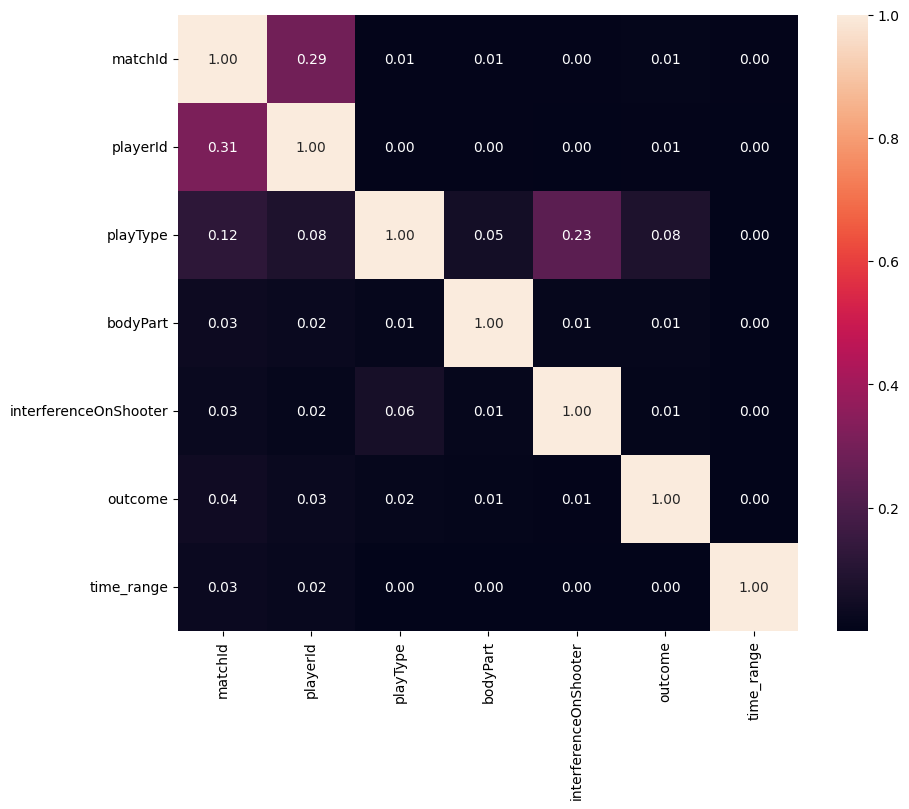

In [96]:
# Assuming df is your DataFrame

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Calculate correlations
correlations = pd.DataFrame()
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            correlations.loc[col1, col2] = 1
            continue
        correlations.loc[col1, col2] = theils_u(df[col1], df[col2])

# Display heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt=".2f")
plt.show()

## Find correlation between numerical and categorical variables

In [97]:
def convert(
    data: Union[List[Number], NDArray, pd.DataFrame],
    to: Literal["array", "list", "dataframe"],
    copy: bool = True,
) -> Union[List[Number], NDArray, pd.DataFrame]:
    converted = None
    if to == "array":
        if isinstance(data, np.ndarray):
            converted = data.copy() if copy else data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.values()  # type: ignore
    elif to == "list":
        if isinstance(data, list):
            converted = data.copy() if copy else data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == "dataframe":
        if isinstance(data, pd.DataFrame):
            converted = data.copy(deep=True) if copy else data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError(
            "cannot handle data conversion of type: {} to {}".format(
                type(data), to
            )
        )
    else:
        return converted  # type: ignore



In [98]:
def correlation_ratio(
    categories: Union[OneDimArray, List[str]],
    measurements: OneDimArray,
    nan_strategy: str = _REPLACE,
    nan_replace_value: Any = _DEFAULT_REPLACE_VALUE,
) -> float:
    """
    Calculates the Correlation Ratio (sometimes marked by the greek letter Eta)
    for categorical-continuous association.

    Answers the question - given a continuous value of a measurement, is it
    possible to know which category is it associated with?

    Value is in the range [0,1], where 0 means a category cannot be determined
    by a continuous measurement, and 1 means a category can be determined with
    absolute certainty.

    Parameters:
    -----------
    categories : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    measurements : list / NumPy ndarray / Pandas Series
        A sequence of continuous measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.

    Returns:
    --------
    float in the range of [0,1]
    """
    categories_array: NDArray = convert(categories, "array")  # type: ignore
    measurements_array: NDArray = convert(measurements, "array")  # type: ignore
    fcat, _ = pd.factorize(categories_array)  # type: ignore
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements_array[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(
        np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2))
    )
    denominator = np.sum(
        np.power(np.subtract(measurements_array, y_total_avg), 2)
    )
    if numerator == 0:
        return 0.0
    else:
        eta = np.sqrt(numerator / denominator)
        if 1.0 < eta <= 1.0 + _PRECISION:
            warnings.warn(
                f"Rounded eta = {eta} to 1. This is probably due to floating point precision issues.",
                RuntimeWarning,
            )
            return 1.0
        else:
            return eta


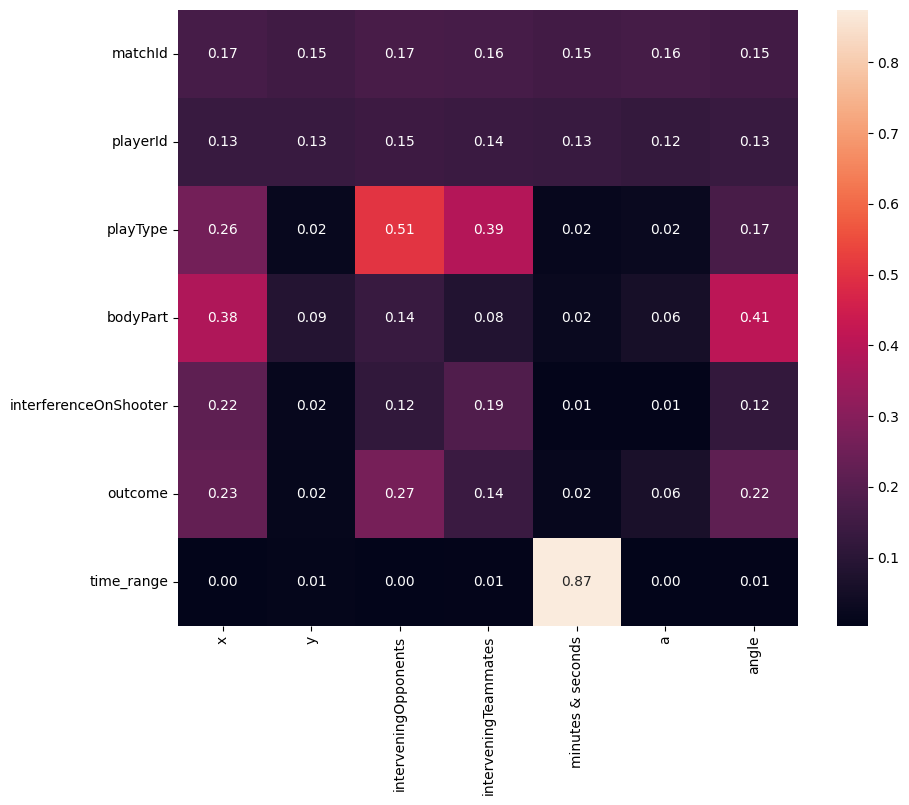

In [99]:
# Assuming df is your DataFrame

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculate correlations
correlations = pd.DataFrame()
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        correlations.loc[cat_col, num_col] = correlation_ratio(df[cat_col], df[num_col])

# Display heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt=".2f")
plt.show()


## Find correlation between all variables

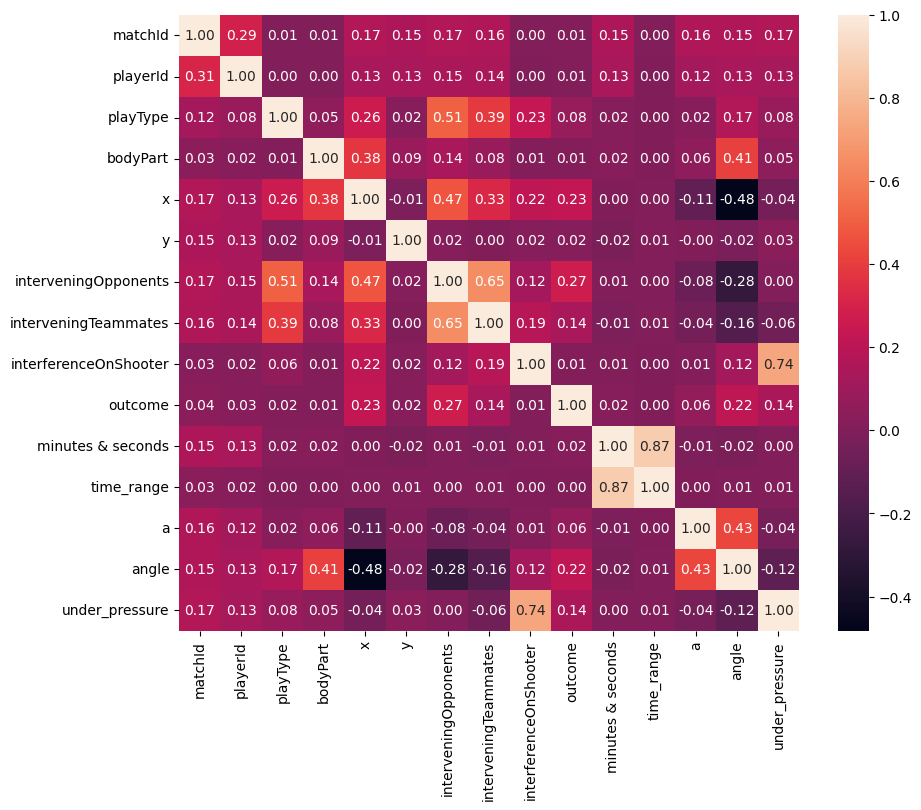

In [100]:
# Assuming df is your DataFrame

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculate correlations
correlations = pd.DataFrame()
for col1 in df.columns:
    for col2 in df.columns:
        if col1 == col2:
            correlations.loc[col1, col2] = 1
            continue
        if df[col1].dtype != 'O' and df[col2].dtype != 'O':  # both are numerical
            correlations.loc[col1, col2] = df[col1].corr(df[col2])
        elif df[col1].dtype == 'O' and df[col2].dtype == 'O':  # both are categorical
            correlations.loc[col1, col2] = theils_u(df[col1], df[col2])
        else:  # one is categorical, one is numerical
            if df[col1].dtype == 'O':
                correlations.loc[col1, col2] = correlation_ratio(df[col1], df[col2])
            else:
                correlations.loc[col1, col2] = correlation_ratio(df[col2], df[col1])

# Display heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt=".2f")
plt.show()

# Feature Analysis by creating new features and evaluating them using ML models

In [101]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def createGoalMouth():
    #Adopted from FC Python
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    linecolor='black'

    #Pitch Outline & Centre Line
    plt.plot([0,65],[0,0], color=linecolor)
    plt.plot([65,65],[50,0], color=linecolor)
    plt.plot([0,0],[50,0], color=linecolor)

    #Left Penalty Area
    plt.plot([12.5,52.5],[16.5,16.5],color=linecolor)
    plt.plot([52.5,52.5],[16.5,0],color=linecolor)
    plt.plot([12.5,12.5],[0,16.5],color=linecolor)

    #Left 6-yard Box
    plt.plot([41.5,41.5],[5.5,0],color=linecolor)
    plt.plot([23.5,41.5],[5.5,5.5],color=linecolor)
    plt.plot([23.5,23.5],[0,5.5],color=linecolor)

    #Goal
    plt.plot([41.5-5.34,41.5-5.34],[-2,0],color=linecolor)
    plt.plot([23.5+5.34,41.5-5.34],[-2,-2],color=linecolor)
    plt.plot([23.5+5.34,23.5+5.34],[0,-2],color=linecolor)

    #Prepare Circles
    leftPenSpot = plt.Circle((65/2,11),0.8,color=linecolor)

    #Draw Circles
    ax.add_patch(leftPenSpot)

    #Prepare Arcs
    leftArc = Arc((32.5,11),height=18.3,width=18.3,angle=0,theta1=38,theta2=142,color=linecolor)

    #Draw Arcs
    ax.add_patch(leftArc)

    #Tidy Axes
    plt.axis('off')

    return fig,ax

In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 59))
df['x'] = scaler.fit_transform(df[['x']])

scaler = MinMaxScaler(feature_range=(7, 99))
df['y'] = scaler.fit_transform(df[['y']])

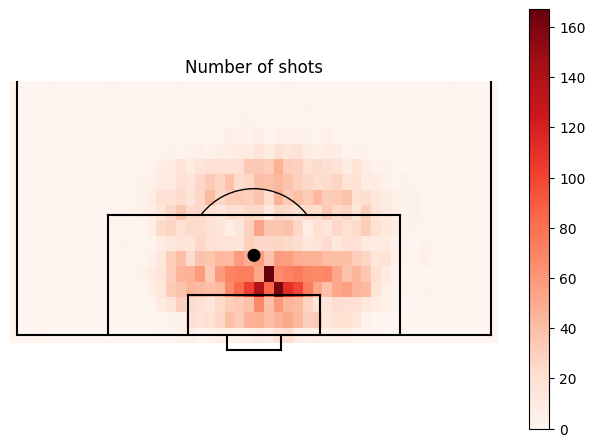

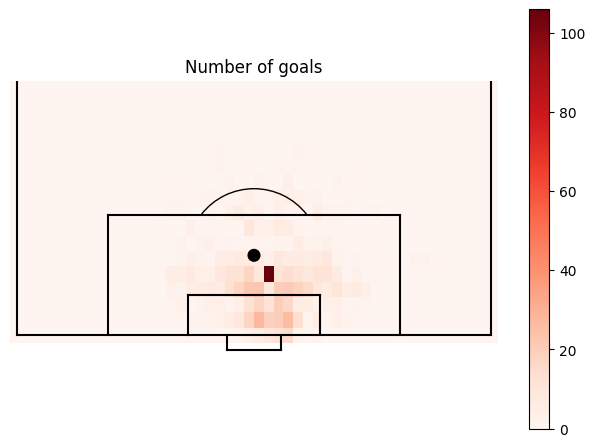

C:\Users\ali18\AppData\Local\Temp\ipykernel_13216\1153999529.py:71: RuntimeWarning: invalid value encountered in divide
  pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)


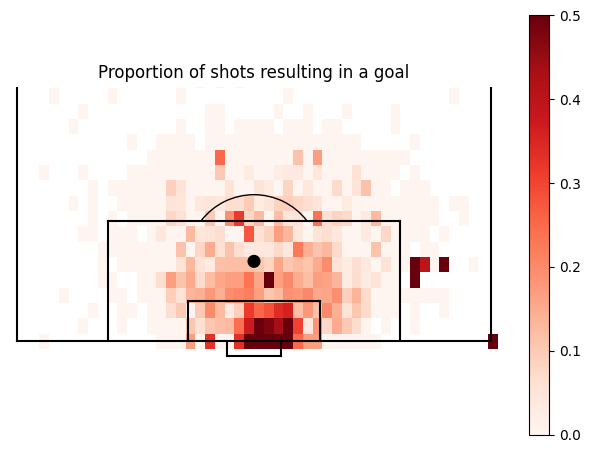

In [103]:
#The basics
import pandas as pd
import numpy as np

#Plotting
import matplotlib.pyplot as plt

#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Create a data set of shots.
train = df
pd.unique(train['outcome'])
shots= df
shots_model=pd.DataFrame(columns=['Goal','X','Y','C'])

for i,shot in shots.iterrows():

    shots_model.at[i,'X']=shot['x']
    shots_model.at[i,'Y']=shot['y']

    #Distance in metres and shot angle in radians.
    x=shots_model.at[i,'X']
    y=shots_model.at[i,'Y']
    shots_model.at[i,'Distance']=np.sqrt(x**2 + y**2)
    a = np.arctan(7.32 *x /(x**2 + y**2 - (7.32/2)**2))
    if a<0:
        a=np.pi+a
    shots_model.at[i,'Angle'] =a

    # Was it a goal
    shots_model.at[i,'Goal'] = 0

    # Check if the outcome is a goal
    if shot['outcome'] == 'goal':
        shots_model.at[i,'Goal'] = 1

#Two dimensional histogram
H_Shot=np.histogram2d(shots_model['X'], shots_model['Y'],bins=50,range=[[0, 100],[0, 100]])
goals_only=shots_model[shots_model['Goal']==1]
H_Goal=np.histogram2d(goals_only['X'], goals_only['Y'],bins=50,range=[[0, 100],[0, 100]])


#Plot the number of shots from different points
(fig,ax) = createGoalMouth()
pos=ax.imshow(H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of shots')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


#Plot the number of GOALS from different points
(fig,ax) = createGoalMouth()
pos=ax.imshow(H_Goal[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of goals')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


#Plot the probability of scoring from different points
(fig,ax) = createGoalMouth()
pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)
fig.colorbar(pos, ax=ax)
ax.set_title('Proportion of shots resulting in a goal')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [104]:
#The basics
import pandas as pd
import numpy as np

#Plotting
import matplotlib.pyplot as plt

#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Create a data set of shots.
train = pd.read_csv(folder_path)
pd.unique(train['outcome'])
shots= train
shots_model=pd.DataFrame(columns=['Goal','X','Y','C'])


for i,shot in shots.iterrows():

    shots_model.at[i,'X']=shot['x']
    shots_model.at[i,'Y']=shot['y']

    #Distance in metres and shot angle in radians.
    x=shots_model.at[i,'X']
    y=shots_model.at[i,'Y']
    shots_model.at[i,'Distance']=np.sqrt(x**2 + y**2)
    a = np.arctan(7.32 *x /(x**2 + y**2 - (7.32/2)**2))
    if a<0:
        a=np.pi+a
    shots_model.at[i,'Angle'] =a

    # Was it a goal
    shots_model.at[i,'Goal'] = 0

    # Check if the outcome is a goal
    if shot['outcome'] == 'goal':
        shots_model.at[i,'Goal'] = 1

#Two dimensional histogram
H_Shot=np.histogram2d(shots_model['X'], shots_model['Y'],bins=50,range=[[0, 100],[0, 100]])
goals_only=shots_model[shots_model['Goal']==1]
H_Goal=np.histogram2d(goals_only['X'], goals_only['Y'],bins=50,range=[[0, 100],[0, 100]])



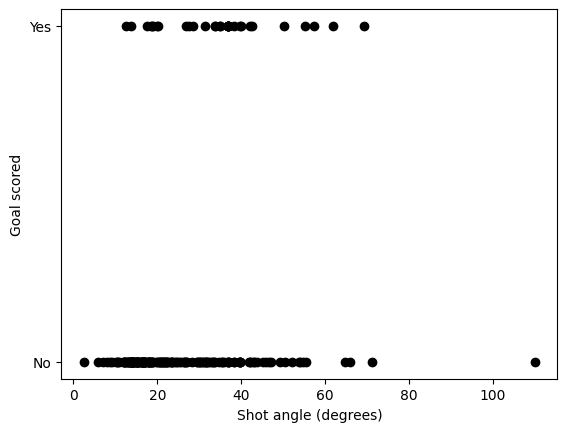

In [105]:
#Get first 200 shots
shots_200=shots_model.iloc[:200]

#Plot first 200 shots goal angle
fig,ax=plt.subplots(num=1)
ax.plot(shots_200['Angle']*180/np.pi, shots_200['Goal'], linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
plt.show()

C:\Users\ali18\AppData\Local\Temp\ipykernel_13216\3141772353.py:11: RuntimeWarning: invalid value encountered in divide
  prob_goal=np.divide(goalcount_dist[0],shotcount_dist[0])


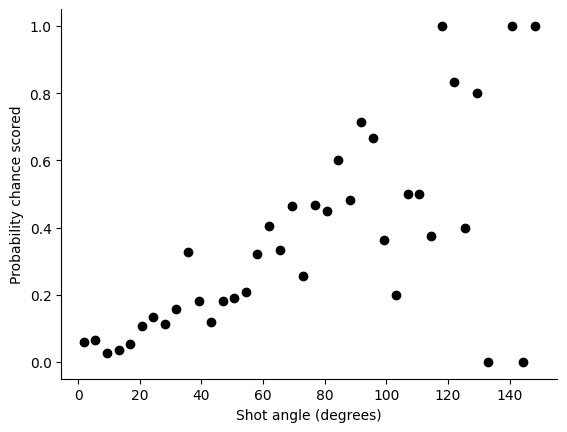

In [106]:
import pandas as pd
import numpy as np
#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf


#Show empirically how goal angle predicts probability of scoring
shotcount_dist=np.histogram(shots_model['Angle']*180/np.pi,bins=40,range=[0, 150])
goalcount_dist=np.histogram(goals_only['Angle']*180/np.pi,bins=40,range=[0, 150])
prob_goal=np.divide(goalcount_dist[0],shotcount_dist[0])
angle=shotcount_dist[1]
midangle= (angle[:-1] + angle[1:])/2
fig,ax=plt.subplots(num=2)
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

C:\Users\ali18\AppData\Local\Temp\ipykernel_13216\288209898.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xGprob=1/(1+np.exp(b[0]+b[1]*midangle*np.pi/180))


                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                 8925
Model:                                GLM   Df Residuals:                     8923
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -2982.7
Date:                    Tue, 14 May 2024   Deviance:                       5965.4
Time:                            00:41:36   Pearson chi2:                 8.52e+03
No. Iterations:                         5   Pseudo R-squ. (CS):            0.06752
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

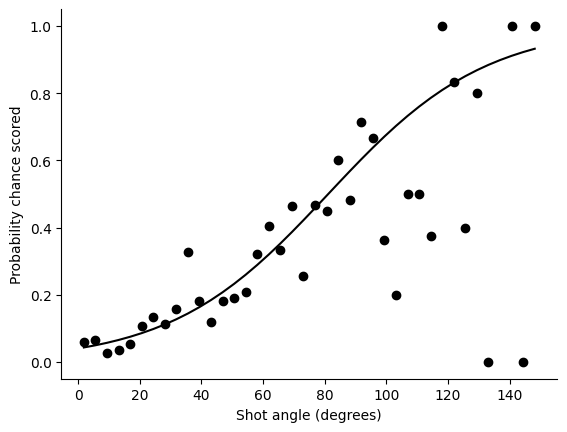

In [107]:
#Make single variable model of angle
#Using logistic regression we find the optimal values of b
#This process minimizes the loglikelihood
test_model = smf.glm(formula="Goal ~ Angle" , data=shots_model,
                           family=sm.families.Binomial()).fit()
print(test_model.summary())
b=test_model.params


xGprob=1/(1+np.exp(b[0]+b[1]*midangle*np.pi/180))
fig,ax=plt.subplots(num=1)
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.plot(midangle, xGprob, linestyle='solid', color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                 8925
Model:                                GLM   Df Residuals:                     8923
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -2949.5
Date:                    Tue, 14 May 2024   Deviance:                       5899.0
Time:                            00:41:36   Pearson chi2:                 1.16e+04
No. Iterations:                         6   Pseudo R-squ. (CS):            0.07444
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

C:\Users\ali18\AppData\Local\Temp\ipykernel_13216\962919393.py:7: RuntimeWarning: invalid value encountered in divide
  prob_goal=np.divide(goalcount_dist[0],shotcount_dist[0])
C:\Users\ali18\AppData\Local\Temp\ipykernel_13216\962919393.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xGprob=1/(1+np.exp(b[0]+b[1]*middistance))


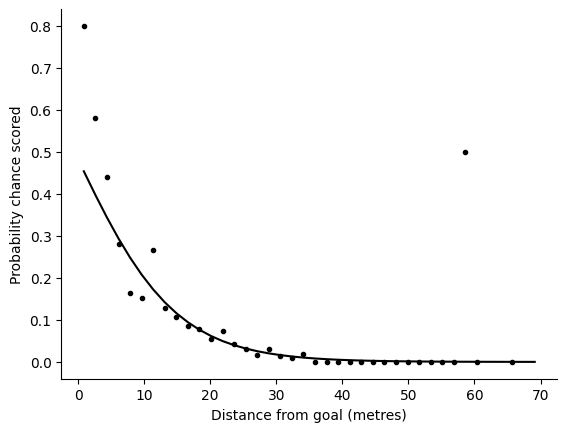

In [108]:
#Now lets look at distance from goal


#Show empirically how distance from goal predicts probability of scoring
shotcount_dist=np.histogram(shots_model['Distance'],bins=40,range=[0, 70])
goalcount_dist=np.histogram(goals_only['Distance'],bins=40,range=[0, 70])
prob_goal=np.divide(goalcount_dist[0],shotcount_dist[0])
distance=shotcount_dist[1]
middistance= (distance[:-1] + distance[1:])/2
fig,ax=plt.subplots(num=1)
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#Make single variable model of distance
test_model = smf.glm(formula="Goal ~ Distance" , data=shots_model,
                           family=sm.families.Binomial()).fit()
print(test_model.summary())
b=test_model.params
xGprob=1/(1+np.exp(b[0]+b[1]*middistance))
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()


                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                 8925
Model:                                GLM   Df Residuals:                     8922
Model Family:                    Binomial   Df Model:                            2
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -2944.6
Date:                    Tue, 14 May 2024   Deviance:                       5889.1
Time:                            00:41:37   Pearson chi2:                 8.81e+03
No. Iterations:                         7   Pseudo R-squ. (CS):            0.07546
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

C:\Users\ali18\AppData\Local\Temp\ipykernel_13216\3933290136.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xGprob=1/(1+np.exp(b[0]+b[1]*middistance+b[2]*pow(middistance,2)))


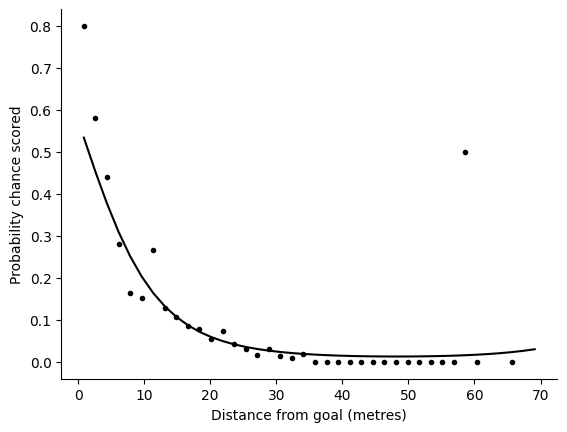

In [109]:
#Adding distance squared
squaredD = shots_model['Distance']**2
shots_model = shots_model.assign(D2=squaredD)
test_model = smf.glm(formula="Goal ~ Distance + D2" , data=shots_model,
                           family=sm.families.Binomial()).fit()
print(test_model.summary())
b=test_model.params
xGprob=1/(1+np.exp(b[0]+b[1]*middistance+b[2]*pow(middistance,2)))
fig,ax=plt.subplots(num=1)
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()


In [110]:
#Adding even more variables to the model.
squaredX = shots_model['X']**2
shots_model = shots_model.assign(X2=squaredX)
#squaredC = shots_model['C']**2
#shots_model = shots_model.assign(C2=squaredC)
AX = shots_model['Angle']*shots_model['X']
shots_model = shots_model.assign(AX=AX)


# A general model for fitting goal probability
# List the model variables you want here
model_variables = ['Angle','Distance']
model=''
for v in model_variables[:-1]:
    model = model  + v + ' + '
model = model + model_variables[-1]


#Fit the model
test_model = smf.glm(formula="Goal ~ " + model, data=shots_model,
                           family=sm.families.Binomial()).fit()
print(test_model.summary())
b=test_model.params


                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                 8925
Model:                                GLM   Df Residuals:                     8922
Model Family:                    Binomial   Df Model:                            2
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -2925.6
Date:                    Tue, 14 May 2024   Deviance:                       5851.2
Time:                            00:41:37   Pearson chi2:                 9.07e+03
No. Iterations:                         6   Pseudo R-squ. (CS):            0.07938
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [111]:
#Return xG value for more general model
def calculate_xG(sh):
   bsum=b[0]
   for i,v in enumerate(model_variables):
       bsum=bsum+b[i+1]*sh[v]
   xG = 1/(1+np.exp(bsum))
   return xG

#Add an xG to my dataframe
xG=shots_model.apply(calculate_xG, axis=1)
shots_model = shots_model.assign(xG=xG)


C:\Users\ali18\AppData\Local\Temp\ipykernel_13216\2451485354.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bsum=b[0]
C:\Users\ali18\AppData\Local\Temp\ipykernel_13216\2451485354.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bsum=bsum+b[i+1]*sh[v]


In [112]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame, and 'x' and 'y' are the columns you want to scale
scaler = MinMaxScaler(feature_range=(0, 59))  # for 'x'
df['x'] = scaler.fit_transform(df[['x']])

scaler = MinMaxScaler(feature_range=(7, 99))  # for 'y'
df['y'] = scaler.fit_transform(df[['y']])

In [113]:
import pandas as pd
import numpy as np


#Plotting
import matplotlib.pyplot as plt

#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Create a data set of shots.
train = df
pd.unique(train['outcome'])
shots= df
shots_model=pd.DataFrame(columns=['Goal','X','Y','C'])

for i,shot in shots.iterrows():

    shots_model.at[i,'X']=shot['x']
    shots_model.at[i,'Y']=shot['y']

    #Distance in metres and shot angle in radians.
    x=shots_model.at[i,'X']
    y=shots_model.at[i,'Y']
    shots_model.at[i,'Distance']=np.sqrt(x**2 + y**2)
    a = np.arctan(7.32 *x /(x**2 + y**2 - (7.32/2)**2))
    if a<0:
        a=np.pi+a
    shots_model.at[i,'Angle'] =a

    # Was it a goal
    shots_model.at[i,'Goal'] = 0

    # Check if the outcome is a goal
    if shot['outcome'] == 'goal':
        shots_model.at[i,'Goal'] = 1

#Two dimensional histogram
H_Shot=np.histogram2d(shots_model['X'], shots_model['Y'],bins=50,range=[[0, 100],[0, 100]])
goals_only=shots_model[shots_model['Goal']==1]
H_Goal=np.histogram2d(goals_only['X'], goals_only['Y'],bins=50,range=[[0, 100],[0, 100]])


C:\Users\ali18\AppData\Local\Temp\ipykernel_13216\1636294546.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bsum=b[0]
C:\Users\ali18\AppData\Local\Temp\ipykernel_13216\1636294546.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bsum=bsum+b[i+1]*sh[v]
C:\Users\ali18\AppData\Local\Temp\ipykernel_13216\1636294546.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bsum=b[0]
C:\Users\ali18\AppData\Local\Temp\ipykernel_13216\1636

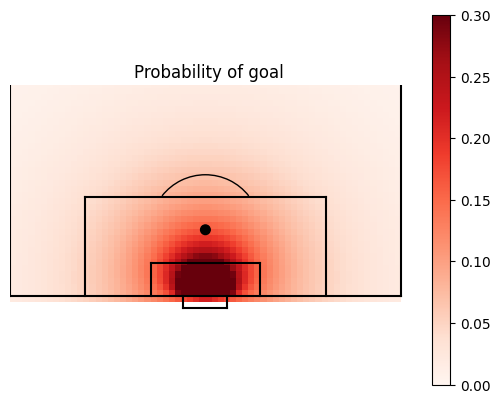

In [114]:
#ReturnxG value for more general model
def calculate_xG(sh):
   bsum=b[0]
   for i,v in enumerate(model_variables):
       bsum=bsum+b[i+1]*sh[v]
   xG = 1/(1+np.exp(bsum))
   return xG

#Add an xG to my dataframe
xG=shots_model.apply(calculate_xG, axis=1)
shots_model = shots_model.assign(xG=xG)


#Create a 2D map of xG
pgoal_2d=np.zeros((65,65))
for x in range(65):
    for y in range(65):
        sh=dict()
        a = np.arctan(7.32 *x /(x**2 + abs(y-65/2)**2 - (7.32/2)**2))
        if a<0:
            a = np.pi + a
        sh['Angle'] = a
        sh['Distance'] = np.sqrt(x**2 + abs(y-65/2)**2)
        sh['D2'] = x**2 + abs(y-65/2)**2
        sh['X'] = x
        sh['AX'] = x*a
        sh['X2'] = x**2
        sh['C'] = abs(y-65/2)
        sh['C2'] = (y-65/2)**2

        pgoal_2d[x,y] =  calculate_xG(sh)

(fig,ax) = createGoalMouth()
pos=ax.imshow(pgoal_2d, extent=[-1,65,65,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.3)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of goal')
plt.xlim((0,66))
plt.ylim((-3,35))
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [115]:
df[(df['playType'] == 'penalty')]

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,outcome,minutes & seconds,time_range,a,angle,under_pressure
35,m_92,p_86,penalty,left foot,9.139085,53.0,1,0,low,goal,58.683333,second half,0.750855,36.901232,False
83,m_91,p_4,penalty,right foot,9.139085,53.0,1,0,low,goal,54.516667,second half,0.750855,36.901232,False
106,m_133,p_124,penalty,right foot,9.139085,53.0,1,0,low,goal,85.316667,second half,0.750855,36.901232,False
124,m_141,p_1,penalty,right foot,9.139085,53.0,1,0,low,goal,81.400000,second half,0.750855,36.901232,False
126,m_206,p_33,penalty,right foot,9.139085,53.0,1,0,low,goal,7.800000,first half,0.750855,36.901232,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8550,m_56,p_77,penalty,right foot,9.139085,53.0,1,0,low,goal,5.583333,first half,0.750855,36.901232,False
8595,m_158,p_90,penalty,right foot,9.139085,53.0,1,0,low,goal,54.600000,second half,0.750855,36.901232,False
8671,m_79,p_33,penalty,right foot,9.139085,53.0,1,0,low,goal,77.516667,second half,0.750855,36.901232,False
8698,m_188,p_58,penalty,right foot,9.139085,53.0,1,0,low,goal,73.116667,second half,0.750855,36.901232,False


In [116]:
# Assuming shots_model is your DataFrame and it has columns 'X', 'Y', and 'xG'
xG_value_penalty = shots_model[(shots_model['X'] == 10.97) & (shots_model['Y'] == 0)]['xG']
print(xG_value_penalty)


Series([], Name: xG, dtype: float64)


# Q1)
****
**Describe your strategy for addressing challenges such as handling missing
values and categorical features. Could you also elaborate on your feature
selection metrics and explain the rationale behind them?**

# Q2)
****
 **Why didn’t we use regression to predict whether a shot would result in a goal?**

Linear Regression is a regression model, which means the output is a continuous variable. Regression models are used to predict continuous data such as home prices, temperature, profits, and so on. When you try to predict the winner of a football game, the output is binary. For example, the winner can only be Team A or Team B. This is known as a classification problem. A note about classification problems is that they do not have to be binary. For example, the winner of an election can be Candidate A, Candidate B, Candidate C, etc.

When we address classification problems, there are algorithms that are more appropriate. These include k Nearest Neighbors, Logistic Regression, Decision Trees, Random Forrest, Gradient Boosting, Neural Networks, Support Vector Machines, and others. Note that Logistic Regression is actually a linear regression after the output data has gone thru a sigmoid curve transformation.

Both Regression and Classification problems are referred to as Supervised Learning problems because your historical data will be labeled, meaning that you will have information about the outcome of past games (e.g. who won). You just need to make sure you apply the proper types of algorithms for the specific problem you are trying to tackle.


You can, although the accuracy is likely to disappoint you.

Modelling is all about building a mental approximation of reality. For example: the team with better players is more likely to win; playing at home is an advantage; and it’s good for the players that have the most experience playing with each other.

Simple linear regression turns that into a formula like:

w
i
n
l
i
k
e
l
i
h
o
o
d
=
e
x
p
e
r
i
e
n
c
e
+
h
o
m
e
a
d
v
a
n
t
a
g
e
+
t
e
a
m
c
o
h
e
s
i
o
n


The places you’re likely to run into trouble are that these variables are rarely linearly correlated with winning. The first five hours of experience might be worth ten points but the next five hours is unlikely to also be worth ten points - training has diminishing returns.

The second place you’re likely to run into trouble is that linear regression assumes all input variables are completely independent. Players with more experience almost invariably have more experience playing with each other. In practice this causes fewer problems than the first issue but it does tend to lead to the model giving overly strong predictions.


The last area you’ll have to solve is turning this from an arbitrary number into who is going to win. You could, for example, predict the score difference.


The base model that is most commonly used is logistic regression analysis. It is used to provide a probability percentage for a given variable and for sports it uses mv, or the margin of victory. This has always been the best indicator of a good team. They adapted this even further into net rating, which is a teams margin of victory over 100 possessions, so teams that play faster or slower get rated at the same scale.

The problem with the logistic regression system is that it only accounts for the 1 variable of margin of victory. But an actual game depends on many variables such as, matchups, players in the game, players that might be injured, history between the 2 teams prior to the season, home field advantage, etc. A lot of the time these things have an impact on the game and finding how much of an impact that can be is what the oddsmakers are trying to figure out. The method that is used to cover this is multiple regression analysis, as the name suggests this uses various pieces of information about the team in the past to see how it will affect outcomes in the future. To use a multiple regression analysis you need a dependent variable you are trying to find and multiple independent variables that relate to the dependent variable. The information that someone will pass through the regression model may be, the current win percentages of the team, their record against each other, and the point differential. And now using the new model with multiple parameters you can get a much better sense of the data and who will win.

# Q3)
****
**How would you go about verifying the accuracy of the given formula used to calculate the shot angle in the preprocessing section?**

![Cat](image.png)

In [117]:
shots_model.to_csv('data\shots_model.csv', index=False)
